# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [59]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import struct

Update the following variable with the output of your Serial Monitor.

In [68]:
print(len(HEXADECIMAL_BYTES))
HEXADECIMAL_BYTES = [0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xA118, 0xA118, 0xA110, 0xA118, 0xC110, 0xC110, 0xC110, 0xA110, 0xC310, 0xC310, 0xC110, 0xC118, 0xA118, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE118, 0xE118, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0xE418, 0xE318, 0x41A, 0x31A, 0xE320, 0xE320, 0xE420, 0xE418, 0x41A, 0x422, 0x2422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2622, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x4422, 0x2622, 0x2422, 0x262A, 0x242A, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xA310, 0xC110, 0xC110, 0xA118, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE118, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0xE418, 0xE420, 0xE418, 0xE418, 0xE318, 0x31A, 0x41A, 0x41A, 0x41A, 0x422, 0x322, 0x422, 0x422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x2422, 0x2622, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x4622, 0x462A, 0x2622, 0x262A, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xA310, 0xC110, 0xC110, 0xC318, 0xA318, 0xA118, 0xA118, 0xA318, 0xA318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x31A, 0x41A, 0x41A, 0x31A, 0x31A, 0x31A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA118, 0xC318, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC118, 0xC118, 0xC110, 0xC110, 0xA110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0x31A, 0x41A, 0xE318, 0x31A, 0x41A, 0x31A, 0x31A, 0x31A, 0x41A, 0x41A, 0x31A, 0x31A, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x242A, 0x2422, 0x2422, 0x242A, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC118, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA118, 0xA118, 0xA110, 0xC310, 0xC318, 0xC310, 0xC310, 0xC118, 0xC118, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0x31A, 0x31A, 0x31A, 0x31A, 0x41A, 0x31A, 0x31A, 0x31A, 0x31A, 0x41A, 0x422, 0x322, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x242A, 0x242A, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA118, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE420, 0x31A, 0x31A, 0x31A, 0x31A, 0x422, 0x41A, 0x31A, 0x31A, 0xE320, 0x422, 0x422, 0x322, 0x322, 0x422, 0x2422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0xE420, 0x422, 0x422, 0x2422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE310, 0xE310, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE320, 0xE318, 0x31A, 0x31A, 0xE418, 0xE418, 0x31A, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x422, 0xE418, 0x322, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2322, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x242A, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC118, 0xC318, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC310, 0xC310, 0xC310, 0xC110, 0xC118, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE318, 0x31A, 0xE418, 0xE318, 0xE420, 0xE320, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x322, 0x2422, 0x2422, 0x422, 0x242A, 0x2422, 0x2422, 0x4422, 0x4422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA118, 0x8110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC318, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC118, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE418, 0xE418, 0xE318, 0x31A, 0x31A, 0x31A, 0xE418, 0xE318, 0xE420, 0xE320, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x2422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x622, 0x2422, 0x2422, 0x2422, 0x4422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA110, 0xA110, 0xC318, 0xC310, 0xC310, 0xC110, 0xC110, 0xC118, 0xC318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE418, 0xE418, 0xE318, 0x31A, 0x31A, 0x31A, 0xE318, 0xE418, 0xE420, 0x31A, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2622, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE320, 0xE420, 0x31A, 0x322, 0x31A, 0x31A, 0x422, 0x422, 0xE420, 0x422, 0x322, 0x322, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0xE420, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x2422, 0x2622, 0x2622, 0x2422, 0x662A, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x41A, 0x422, 0x31A, 0x322, 0x31A, 0x31A, 0x31A, 0x41A, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0xE420, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x622, 0x422, 0x2422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2622, 0x2622, 0x4422, 0x422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xA310, 0xC310, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE418, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x422, 0xE420, 0x322, 0x31A, 0x31A, 0x31A, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x4422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA318, 0xA318, 0xA318, 0xA318, 0xC310, 0xC318, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC418, 0xE418, 0xE418, 0xE318, 0xE418, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0x41A, 0x41A, 0x322, 0xE320, 0x422, 0x422, 0x31A, 0x31A, 0x41A, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA318, 0xA318, 0xA310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC118, 0xC318, 0xC118, 0xE118, 0xC118, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0x31A, 0x31A, 0x31A, 0xE418, 0xE418, 0x322, 0xE320, 0xE320, 0x322, 0x31A, 0x31A, 0x41A, 0x41A, 0x41A, 0x322, 0xE420, 0xE420, 0x422, 0x422, 0xE420, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA118, 0xA118, 0xA118, 0xA310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC118, 0xC118, 0xC118, 0xC118, 0xC118, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE418, 0xE418, 0xE418, 0x31A, 0x31A, 0x31A, 0x322, 0x31A, 0x31A, 0x41A, 0x41A, 0x41A, 0x41A, 0x422, 0x322, 0x422, 0x422, 0x422, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA118, 0xA118, 0xA118, 0xA310, 0xA318, 0xA110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC310, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0x31A, 0x41A, 0x41A, 0xE318, 0xE320, 0x31A, 0x422, 0x41A, 0x41A, 0x41A, 0x41A, 0x31A, 0x322, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x422, 0x2422, 0x422, 0x2422, 0x2422, 0x2422, 0x2422, 0x422, 0x2422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA118, 0xA118, 0xA110, 0xA310, 0xC110, 0xC110, 0xC310, 0xC318, 0xC318, 0xC310, 0xC310, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0x31A, 0x31A, 0x422, 0x422, 0xE418, 0x31A, 0x41A, 0x41A, 0x31A, 0x41A, 0x422, 0x422, 0xE420, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x2422, 0x422, 0x2422, 0x422, 0x422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA318, 0xA318, 0xA118, 0xA110, 0xA310, 0xC110, 0xA110, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x422, 0x31A, 0x41A, 0x41A, 0x41A, 0x31A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x2422, 0x2422, 0x2422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA318, 0xA318, 0xA318, 0xA318, 0xA110, 0xA310, 0xA110, 0xA310, 0xC110, 0xC310, 0xC110, 0xC310, 0xC310, 0xC110, 0xC110, 0xC118, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE320, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0x322, 0xE418, 0x422, 0x422, 0xE418, 0xE420, 0xE420, 0xE420, 0xE418, 0x31A, 0x31A, 0x31A, 0x322, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x41A, 0x31A, 0x422, 0x422, 0x41A, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA118, 0xA118, 0xA118, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC318, 0xC110, 0xC110, 0xE110, 0xE110, 0xC110, 0xC318, 0xC118, 0xC118, 0xC118, 0xC118, 0xE118, 0xE118, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE320, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0x422, 0x422, 0xE320, 0xE320, 0xE420, 0xE420, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x41A, 0x422, 0xE418, 0x422, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x2422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA118, 0xA110, 0xA118, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xE110, 0xC318, 0xC318, 0xC318, 0xC118, 0xC118, 0xE110, 0xE118, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x41A, 0xE418, 0x41A, 0xE418, 0xE320, 0xE318, 0xE420, 0xE420, 0xE420, 0xE420, 0xE318, 0x422, 0xE420, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x422, 0x2422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA318, 0xA310, 0xA118, 0xA118, 0xA318, 0xA318, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC110, 0xE110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC118, 0xC118, 0xE118, 0xC118, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x31A, 0x31A, 0xE320, 0xE318, 0xE420, 0xE420, 0x422, 0xE320, 0xE418, 0x422, 0xE420, 0xE420, 0x422, 0x422, 0x422, 0x422, 0x422, 0x41A, 0x31A, 0x322, 0x322, 0x322, 0x422, 0x422, 0x422, 0xE420, 0xE420, 0xE420, 0x422, 0x422, 0x2422, 0x422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA310, 0xA318, 0xA110, 0xA310, 0xA310, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC118, 0xC118, 0xC118, 0xE118, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x31A, 0x31A, 0xE318, 0xE418, 0x41A, 0x41A, 0x31A, 0xE418, 0x422, 0x422, 0x41A, 0x41A, 0x41A, 0x41A, 0x422, 0xE420, 0x422, 0x422, 0x422, 0x322, 0x322, 0x422, 0x422, 0xE420, 0xE420, 0xE418, 0xE420, 0x422, 0x41A, 0x41A, 0x2422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC310, 0xA110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC118, 0xA118, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE118, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE418, 0x31A, 0x41A, 0x31A, 0x31A, 0x31A, 0xE318, 0xE418, 0x41A, 0x41A, 0x31A, 0xE418, 0xE420, 0x422, 0x41A, 0x41A, 0x41A, 0x41A, 0xE418, 0xE320, 0x322, 0x322, 0x422, 0x322, 0x322, 0x322, 0x422, 0x422, 0x422, 0x2422, 0x422, 0x422, 0x41A, 0x422, 0x2422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0x31A, 0xE418, 0x31A, 0x31A, 0x31A, 0x31A, 0xE418, 0x41A, 0xE418, 0x31A, 0xE318, 0x31A, 0x31A, 0x31A, 0x41A, 0x41A, 0x41A, 0x41A, 0x31A, 0x31A, 0x322, 0xE420, 0x422, 0x322, 0x322, 0x422, 0x41A, 0x322, 0x422, 0x41A, 0x41A, 0x41A, 0x422, 0x2422, 0x2422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC318, 0xA310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xC118, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0xE418, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x41A, 0x31A, 0x31A, 0x41A, 0x41A, 0x41A, 0x31A, 0x31A, 0x31A, 0xE320, 0xE320, 0x322, 0x322, 0xE320, 0x31A, 0x322, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA318, 0xA310, 0xA110, 0xA110, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0x31A, 0x41A, 0x41A, 0x41A, 0x31A, 0x41A, 0x41A, 0x41A, 0x41A, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x322, 0x31A, 0x322, 0xE418, 0xE420, 0x422, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xC318, 0xC110, 0xC110, 0xC110, 0xC118, 0xC118, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE320, 0xE320, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x41A, 0x41A, 0x41A, 0xE418, 0xE418, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x41A, 0x31A, 0x31A, 0x422, 0x322, 0x31A, 0x322, 0xE418, 0x422, 0x422, 0x322, 0x422, 0x422, 0x422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC318, 0xC318, 0xC310, 0xC110, 0xC110, 0xC118, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x322, 0x422, 0x322, 0xE320, 0x322, 0x422, 0x422, 0xE418, 0x31A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA310, 0xA318, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC118, 0xC110, 0xA310, 0xA310, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE118, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x41A, 0x31A, 0x41A, 0x41A, 0x41A, 0x41A, 0x31A, 0x322, 0x422, 0xE420, 0x422, 0x422, 0xE420, 0xE320, 0x422, 0x422, 0x422, 0xE420, 0xE320, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA318, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC118, 0xA118, 0xA118, 0xA318, 0xA318, 0xC318, 0xA310, 0xC310, 0xA318, 0xA310, 0xC310, 0xC310, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE310, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE418, 0x41A, 0x41A, 0x41A, 0x31A, 0x31A, 0x31A, 0xE418, 0x41A, 0x41A, 0x31A, 0x31A, 0xE418, 0x422, 0x422, 0xE420, 0xE420, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC318, 0xA110, 0xA310, 0xC110, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0x41A, 0x41A, 0x31A, 0x31A, 0x31A, 0xE320, 0xE318, 0xE318, 0x31A, 0xE318, 0xE420, 0xE420, 0xE420, 0xE420, 0xE320, 0xE320, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC118, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA118, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE318, 0xE310, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0xE318, 0xE318, 0xE418, 0x41A, 0x41A, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0xE318, 0xE420, 0x422, 0x422, 0x422, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA110, 0xC110, 0xC118, 0xA310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0xE318, 0xE318, 0xE318, 0xE418, 0x41A, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0xE418, 0x422, 0x322, 0x322, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC310, 0xC110, 0xC310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE418, 0xE418, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0xE318, 0xE318, 0x31A, 0x41A, 0xE318, 0x31A, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x322, 0x322, 0x322, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA318, 0xA118, 0xA118, 0xC110, 0xC110, 0xC310, 0xC310, 0xA310, 0xA318, 0xA310, 0xC310, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0xE318, 0xE318, 0x31A, 0x41A, 0xE318, 0xE318, 0xE318, 0x31A, 0x41A, 0x41A, 0x31A, 0x31A, 0x322, 0x322, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA310, 0xA110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xC110, 0xA110, 0xC310, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE318, 0x31A, 0x31A, 0xE320, 0x31A, 0xE318, 0xE318, 0xE318, 0xE418, 0x31A, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x41A, 0x422, 0x31A, 0x322, 0x322, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA118, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC310, 0xC110, 0xA310, 0xC310, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE418, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0x31A, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0xE318, 0x41A, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xA310, 0xC110, 0xC310, 0xC310, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE320, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x422, 0x41A, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE110, 0xC118, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE310, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE320, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x422, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC110, 0xE110, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x41A, 0x31A, 0x41A, 0xE418, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC318, 0xC110, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE318, 0xE318, 0x31A, 0xE318, 0xE318, 0xE318, 0x41A, 0x41A, 0x41A, 0x41A, 0xE418, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x41A, 0x422, 0x422, 0xE420, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0x422, 0x422, 0xE420, 0x422, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE418, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE318, 0xE320, 0xE320, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA318, 0xA310, 0xC110, 0xC110, 0xA110, 0xC310, 0xC310, 0xA310, 0xC318, 0xC310, 0xC310, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xE318, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE318, 0x31A, 0xE418, 0x31A, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA318, 0xA310, 0xC110, 0xC110, 0xE318, 0xE318, 0xC110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xE318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE418, 0xE418, 0xE418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x31A, 0x31A, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC310, 0xC110, 0xA110, 0xA110, 0xA310, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xE110, 0xE310, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC310, 0xC110, 0xC110, 0xC310, 0xC310, 0xE318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xC418, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x31A, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC118, 0xC118, 0xC118, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0x31A, 0x31A, 0x31A, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xA318, 0xA310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC110, 0xC110, 0xA110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xA118, 0xC118, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA110, 0xC110, 0xA110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xA310, 0xA318, 0xA118, 0xC118, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xA310, 0xA310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC318, 0xA110, 0xC118, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC310, 0xC310, 0xA110, 0xA110, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE418, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xA310, 0xC310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC310, 0xC310, 0xA110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC310, 0xC318, 0xC310, 0xC318, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC310, 0xC318, 0xA310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA310, 0xC318, 0xA310, 0xA310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC118, 0xC110, 0xC118, 0xA118, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC110, 0xA318, 0xA118, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC310, 0xC110, 0xC310, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE118, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC118, 0xC110, 0xC110, 0xE110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC110, 0xC310, 0xC318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xA310, 0xA310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xE318, 0xE318, 0xE310, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xE318, 0xE318, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC318, 0xC310, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA318, 0xA318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC118, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xC110, 0xA310, 0xA318, 0xA318, 0xA318, 0xA318, 0xA310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xA310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC118, 0xC118, 0xC318, 0xC310, 0xC118, 0xC318, 0xC318, 0xC318, 0xE318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xC310, 0xC318, 0xC318, 0xE318, 0xE318, 0xC318, 0xC318, 0xC318, 0xE318, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC110, 0xC110, 0xC318, 0xC310, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE310, 0xE310, 0xE318, 0xE318, 0xA110, 0xA110, 0x8110, 0x8110, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xC310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC310, 0xC310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC118, 0xC310, 0xC310, 0xC310, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC110, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xE318, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC310, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC110, 0xC310, 0xC110, 0xC110, 0xC310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC110, 0xC110, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0x8310, 0xA110, 0xA310, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC310, 0xA310, 0xC310, 0xC110, 0xC310, 0xC310, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC310, 0xC310, 0xC110, 0xC110, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xE318, 0xC318, 0xA110, 0xA110, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC110, 0xC310, 0xC310, 0xC310, 0xE310, 0xE310, 0xA310, 0xA310, 0x8310, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xC310, 0xA110, 0xA110, 0xA110, 0xC310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA110, 0xA310, 0xC310, 0xC310, 0xC110, 0xA310, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC318, 0xC318, 0xC110, 0xC110, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xC318, 0xC310, 0xC310, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA110, 0xA310, 0x8310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC410, 0xA310, 0xA310, 0xA310, 0xA110, 0x8310, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC310, 0xA310, 0xA110, 0xC110, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC110, 0xA310, 0xA310, 0xC310, 0xC310, 0xA110, 0xC110, 0xA110, 0xA110, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xC110, 0xC310, 0xA310, 0xC318, 0xC310, 0xC310, 0xC310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xC310, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xC110, 0xA110, 0xC318, 0xA310, 0xA318, 0xA318, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC118, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC410, 0xC410, 0xE410, 0xE610, 0xE610, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xE410, 0xE410, 0xC410, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xC310, 0xC410, 0xE410, 0xE410, 0xC410, 0xC410, 0xA410, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xA310, 0xA318, 0xA318, 0xA310, 0xC318, 0xC310, 0xC310, 0xC318, 0xA310, 0xC318, 0xC110, 0xC110, 0xC310, 0xC310, 0xC110, 0xC310, 0xC318, 0xC318, 0xC310, 0xE110, 0xC110, 0xC110, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xE410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC410, 0xC410, 0xE610, 0xE610, 0xE610, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xE410, 0xE410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC310, 0xE310, 0xE410, 0xE410, 0x412, 0xE410, 0xC410, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC410, 0xC410, 0xE410, 0xE410, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xA310, 0xA110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA318, 0xA310, 0xC318, 0xC310, 0xC318, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC110, 0xC118, 0xC118, 0xA318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA310, 0xA310, 0xC310, 0xC310, 0xC410, 0xE410, 0xE410, 0x612, 0xE610, 0xC610, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC310, 0xE410, 0xE410, 0xE610, 0xE610, 0xE610, 0xE410, 0xC410, 0xC310, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xE410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xE410, 0xE410, 0x412, 0x612, 0xE410, 0xC410, 0xC410, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0x8310, 0xA310, 0x8310, 0xC310, 0xE310, 0xC310, 0xC310, 0xC310, 0xE310, 0xE310, 0xC410, 0xE410, 0xE410, 0xE410, 0xC410, 0xC310, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA310, 0xA110, 0xA110, 0xC310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xA310, 0xA310, 0xC310, 0xC310, 0xA310, 0xA318, 0xC318, 0xC318, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xA310, 0xC318, 0xC310, 0xC310, 0xC110, 0xC118, 0xC118, 0xC118, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC318, 0xA310, 0xC310, 0xC310, 0xC310, 0xE410, 0xE410, 0x412, 0x412, 0xE410, 0xE610, 0xE410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xC310, 0xC310, 0xE410, 0xE410, 0xE610, 0xE610, 0xE610, 0xE410, 0xE410, 0xC310, 0xC310, 0xC310, 0xC310, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0xC410, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE310, 0xE410, 0x412, 0x412, 0x612, 0x612, 0x412, 0xE410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC310, 0xC310, 0xE310, 0xE310, 0xE310, 0xE310, 0x312, 0xE410, 0xE410, 0xC410, 0xC310, 0xC410, 0xC310, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xC410, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC110, 0xA310, 0xA310, 0xA318, 0xA318, 0xC110, 0xC110, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xC310, 0xA310, 0xC318, 0xC310, 0xC110, 0xC110, 0xC118, 0xC118, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC410, 0xE410, 0xC410, 0xE410, 0xE610, 0xE410, 0xE610, 0xE610, 0xE410, 0xC410, 0xA410, 0xA410, 0xA310, 0xA310, 0xA310, 0xA110, 0xC310, 0xC310, 0xE410, 0xE410, 0x612, 0x612, 0x612, 0x612, 0xE610, 0xE410, 0xC410, 0xC310, 0xC310, 0xC410, 0xC410, 0xE410, 0x612, 0xE610, 0xE610, 0xE410, 0xC410, 0xA410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE310, 0xE410, 0x412, 0x612, 0x612, 0x612, 0xE610, 0xE410, 0xC310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x412, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xE410, 0xE410, 0x612, 0x612, 0xE610, 0xC410, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC310, 0xA310, 0xA310, 0xA318, 0xA318, 0xC318, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC318, 0xA310, 0xA318, 0xA310, 0xA310, 0xC310, 0xC318, 0xC310, 0xC310, 0xC118, 0xC118, 0xA118, 0xA118, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC410, 0x412, 0x4412, 0x4612, 0x4612, 0x2612, 0x612, 0x412, 0xE410, 0xC410, 0xC410, 0xC410, 0xC310, 0xC310, 0xC310, 0xC310, 0xE310, 0xE310, 0xC410, 0x412, 0x2612, 0x2512, 0x612, 0x612, 0x612, 0xE410, 0xC410, 0xC410, 0xC310, 0xC310, 0xE410, 0x412, 0x612, 0x612, 0x612, 0xE410, 0xC410, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xE310, 0x412, 0x412, 0x612, 0x612, 0x612, 0x612, 0x412, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x412, 0x412, 0x412, 0x412, 0x612, 0x612, 0x612, 0x612, 0x412, 0xE410, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x8310, 0x8310, 0xA310, 0xA110, 0x8110, 0x8310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA318, 0xA318, 0xA310, 0xC110, 0xC110, 0xA310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xA310, 0xA310, 0xA318, 0xA318, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xA118, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC410, 0xC410, 0xC310, 0xE410, 0xE410, 0x2612, 0x4612, 0x4512, 0x4512, 0x4512, 0x4512, 0x2612, 0x612, 0xE610, 0xE410, 0xC410, 0xC410, 0xC310, 0xE410, 0xC410, 0xE410, 0x612, 0x2612, 0x2512, 0x2512, 0x2512, 0x2512, 0x612, 0xE410, 0xE410, 0xC410, 0xE410, 0x412, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0xE410, 0xC410, 0xC310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC410, 0xC410, 0xE410, 0x412, 0x612, 0x612, 0x2612, 0x612, 0xE610, 0xE410, 0xC410, 0xC310, 0xC310, 0xC310, 0xE410, 0xE410, 0x412, 0xE410, 0xE410, 0xE410, 0xE610, 0xE610, 0xE610, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x612, 0xE610, 0x612, 0x612, 0x612, 0x612, 0x612, 0xE410, 0xE310, 0xC310, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA318, 0xA318, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xA310, 0xA310, 0xA118, 0xA110, 0xA110, 0xC310, 0xA310, 0xA310, 0xA318, 0xC310, 0xC310, 0xC318, 0xA118, 0xA118, 0xC118, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC410, 0xC410, 0xC410, 0xE410, 0x412, 0x4612, 0x4612, 0x4612, 0x4512, 0x4512, 0x4512, 0x2612, 0x612, 0x412, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x612, 0x612, 0x2512, 0x2512, 0x2512, 0x2512, 0x612, 0x612, 0xE410, 0xE410, 0xE410, 0x412, 0x412, 0x612, 0x2612, 0x2612, 0x612, 0x612, 0xE410, 0xE410, 0xC410, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC410, 0xE410, 0x412, 0x612, 0x612, 0x2612, 0x612, 0x612, 0xE610, 0xE410, 0xC410, 0xC310, 0xE310, 0xE310, 0xE410, 0x412, 0x412, 0x412, 0x412, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0xE410, 0xE310, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA118, 0xA110, 0xC110, 0xC118, 0xA318, 0xA318, 0xA310, 0xC318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC410, 0xC410, 0xC410, 0xE410, 0x412, 0x2512, 0x4512, 0x6512, 0x4512, 0x4512, 0x4512, 0x512, 0x612, 0x612, 0xE610, 0xE610, 0xE610, 0xE610, 0xE410, 0x612, 0x612, 0x612, 0x2512, 0x4512, 0x4512, 0x2512, 0x2512, 0x512, 0x612, 0xE410, 0xE410, 0xE410, 0x612, 0x2612, 0x4612, 0x4512, 0x6512, 0x4512, 0x4512, 0x2512, 0xE610, 0xE410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xE610, 0xE610, 0x612, 0x612, 0x2512, 0x2512, 0x2512, 0x2612, 0x612, 0xE610, 0xE410, 0xE410, 0xE310, 0x412, 0x412, 0x412, 0x412, 0x412, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x612, 0x612, 0x412, 0x412, 0x412, 0x612, 0x612, 0xE410, 0xC410, 0xC310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xA310, 0xA318, 0xA310, 0xA310, 0xC110, 0xA118, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC410, 0xC410, 0xC310, 0x412, 0x2412, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x2512, 0x612, 0x612, 0xE410, 0xE610, 0xE610, 0xE610, 0x612, 0x612, 0x612, 0x2612, 0x4512, 0x4512, 0x4512, 0x4512, 0x2512, 0x612, 0x612, 0xE410, 0xE410, 0xE410, 0x612, 0x4612, 0x4612, 0x4612, 0x4512, 0x6512, 0x4512, 0x512, 0x612, 0xE410, 0xE410, 0xE410, 0xC410, 0xC410, 0xE410, 0x412, 0x612, 0x2612, 0x2512, 0x4512, 0x4512, 0x2512, 0x2612, 0x612, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x412, 0x412, 0x412, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x412, 0x412, 0xE410, 0xE410, 0xE410, 0xE410, 0x412, 0x412, 0x612, 0x412, 0x412, 0x612, 0x612, 0xE610, 0xE410, 0xC410, 0xC310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC110, 0xC110, 0xA118, 0xA310, 0xC318, 0xA110, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xE318, 0xC310, 0xC310, 0xE310, 0xE410, 0x2612, 0x4512, 0x4712, 0x6712, 0x4712, 0x4712, 0x4712, 0x2512, 0x612, 0x612, 0x612, 0x612, 0xE610, 0xE610, 0x612, 0x612, 0x2612, 0x2512, 0x4512, 0x4712, 0x4712, 0x2712, 0x2512, 0x2512, 0xE410, 0xE410, 0xE410, 0xE410, 0x2612, 0x6612, 0x6512, 0x6512, 0x4712, 0x4712, 0x4512, 0x512, 0x612, 0x612, 0xE610, 0xE610, 0xE610, 0xE610, 0xE610, 0x612, 0x2612, 0x2612, 0x4512, 0x4512, 0x4512, 0x2512, 0x2512, 0x2612, 0x612, 0xE410, 0xE410, 0xE410, 0x412, 0x612, 0x612, 0x2612, 0x4612, 0x2612, 0x2612, 0x2612, 0x612, 0xE410, 0x412, 0xE410, 0xE610, 0x612, 0x612, 0x612, 0x612, 0x612, 0x2612, 0x4612, 0x612, 0xE610, 0xE410, 0xE410, 0xC410, 0xC310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xC310, 0xC110, 0xA310, 0xC318, 0xC310, 0xC310, 0xC310, 0xC110, 0xC310, 0xC310, 0xC318, 0xC318, 0xC410, 0xC310, 0xE310, 0x412, 0x4612, 0x4712, 0x6712, 0x6712, 0x4712, 0x4712, 0x2712, 0x2512, 0x612, 0x612, 0x612, 0x412, 0x412, 0x412, 0x612, 0x2612, 0x2612, 0x4512, 0x4512, 0x6712, 0x4712, 0x4512, 0x2512, 0x4512, 0xE610, 0xE410, 0xE410, 0x412, 0x2612, 0x4612, 0x6512, 0x6512, 0x6712, 0x4712, 0x4512, 0x512, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0x2612, 0x2612, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x512, 0x612, 0xE410, 0xE410, 0x412, 0x412, 0x2612, 0x2612, 0x2612, 0x2612, 0x2612, 0x4612, 0x2612, 0x4612, 0x4612, 0x2612, 0x612, 0x2612, 0x2512, 0x2512, 0x612, 0x2612, 0x2612, 0x2612, 0x2612, 0x2512, 0x2612, 0x612, 0xE610, 0xC410, 0xC310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC310, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xA310, 0xA310, 0xC310, 0xC110, 0xA310, 0xC318, 0xC310, 0xC310, 0xA318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC410, 0x612, 0x4512, 0x4712, 0x6712, 0x4812, 0x4812, 0x4712, 0x2512, 0x612, 0x612, 0x612, 0x612, 0x412, 0xE410, 0x412, 0x612, 0x2612, 0x2512, 0x4512, 0x6712, 0x6812, 0x6812, 0x6712, 0x4712, 0x4512, 0xE610, 0xE410, 0xE410, 0x412, 0x4612, 0x6512, 0x6512, 0x6712, 0x6712, 0x6712, 0x4512, 0x2512, 0x612, 0x612, 0x612, 0x412, 0x612, 0xE610, 0x612, 0x612, 0x2612, 0x4612, 0x4512, 0x4712, 0x4712, 0x4512, 0x4512, 0x2512, 0xE610, 0xE410, 0xE410, 0xE410, 0x612, 0x2612, 0x4512, 0x4512, 0x4512, 0x4612, 0x4612, 0x4512, 0x4612, 0x2612, 0x4612, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x4512, 0x4512, 0x2612, 0xE410, 0xC410, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC110, 0xC110, 0xC110, 0xA310, 0xC310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xE410, 0x2412, 0x4512, 0x6712, 0x6812, 0x6812, 0x4812, 0x2712, 0x2512, 0x612, 0x612, 0xE610, 0x612, 0xE610, 0xE410, 0xE410, 0x612, 0x2612, 0x2612, 0x4512, 0x6712, 0x6712, 0x6812, 0x6712, 0x4712, 0x2712, 0xE610, 0xE410, 0x412, 0x412, 0x4612, 0x6512, 0x8712, 0x8712, 0x8712, 0x6712, 0x4512, 0x2612, 0x612, 0x612, 0x612, 0x412, 0x412, 0x612, 0x612, 0x612, 0x2612, 0x4512, 0x4512, 0x6712, 0x6712, 0x4712, 0x2712, 0x2512, 0xE610, 0xE410, 0xE410, 0xE410, 0x612, 0x2612, 0x4512, 0x4512, 0x4512, 0x2512, 0x4512, 0x4612, 0x4612, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x4512, 0x4512, 0x4512, 0x6512, 0x4712, 0x4512, 0x4512, 0x2612, 0xE410, 0xC410, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC310, 0xC310, 0xC310, 0xC318, 0xC318, 0xC318, 0xC310, 0xC310, 0xC310, 0xE410, 0x4612, 0x6712, 0x6712, 0x6712, 0x6812, 0x4712, 0x2512, 0x2612, 0x2612, 0x612, 0xE410, 0xE410, 0x412, 0xE410, 0xE410, 0x412, 0x612, 0x2612, 0x6512, 0x6712, 0x6712, 0x8812, 0x6712, 0x4712, 0x512, 0xE610, 0xE410, 0xE410, 0x612, 0x4512, 0x6712, 0x8712, 0x8812, 0x8712, 0x4712, 0x4512, 0x2612, 0x612, 0x612, 0x612, 0x412, 0x412, 0x612, 0x612, 0x2612, 0x4512, 0x4512, 0x6812, 0x4812, 0x4712, 0x6712, 0x4712, 0x2512, 0xE610, 0xE410, 0xE410, 0xE410, 0x2412, 0x4612, 0x4512, 0x4512, 0x4712, 0x4512, 0x4512, 0x4512, 0x4512, 0x2512, 0x2512, 0x2712, 0x2512, 0x2712, 0x2512, 0x4512, 0x4512, 0x4512, 0x4712, 0x4712, 0x4512, 0x4512, 0x2512, 0xE610, 0xC310, 0xC310, 0xA310, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xA110, 0xC310, 0xA310, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA310, 0xA118, 0xC118, 0xC118, 0xC118, 0xC310, 0xC110, 0xC310, 0xE410, 0x4612, 0x6712, 0x6712, 0x8812, 0x6712, 0x4712, 0x4512, 0x612, 0xE610, 0xC410, 0xC410, 0xA310, 0xC310, 0xC310, 0xE410, 0xE410, 0x412, 0x2612, 0x6512, 0x6712, 0x8712, 0x8812, 0x6712, 0x2712, 0x512, 0xE410, 0xE410, 0x412, 0x2612, 0x6712, 0x6712, 0x8812, 0x8812, 0x6812, 0x4712, 0x4512, 0x2612, 0x612, 0x612, 0x612, 0x412, 0x412, 0x612, 0x612, 0x2612, 0x2512, 0x4712, 0x8812, 0x8812, 0x8812, 0x6812, 0x4712, 0x2512, 0x612, 0xE410, 0xE410, 0x412, 0x2412, 0x2612, 0x4512, 0x4512, 0x4712, 0x4712, 0x4512, 0x4512, 0x4512, 0x4512, 0x2512, 0x2512, 0x2512, 0x4512, 0x4512, 0x4512, 0x6512, 0x6512, 0x4712, 0x4712, 0x4512, 0x4512, 0x2512, 0xE610, 0xC310, 0xA310, 0x8310, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC318, 0xC310, 0xE310, 0x4612, 0x4512, 0x6512, 0x4712, 0x6512, 0x6512, 0x2512, 0x612, 0xE610, 0xA410, 0xC410, 0xC410, 0xC310, 0xC310, 0xC310, 0xC310, 0x312, 0xE410, 0x4612, 0x4512, 0x6712, 0x8712, 0x8712, 0x8712, 0x4512, 0xE510, 0xE410, 0xE410, 0x412, 0x2612, 0x6712, 0x6812, 0x6812, 0x6812, 0x6812, 0x2712, 0x2512, 0x612, 0x612, 0x612, 0x412, 0x412, 0x412, 0x412, 0x612, 0x2612, 0x4512, 0x4712, 0x6812, 0x6812, 0x6812, 0x6812, 0x4712, 0x512, 0x612, 0xE410, 0xE410, 0xE410, 0x412, 0x2612, 0x4512, 0x4712, 0x4712, 0x4712, 0x4712, 0x4512, 0x4512, 0x4512, 0x2512, 0x2512, 0x4512, 0x4512, 0x4512, 0x4512, 0x6712, 0x6712, 0x6812, 0x4712, 0x4712, 0x4712, 0x2512, 0xC610, 0xC310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xC318, 0xC110, 0x312, 0x2612, 0x4512, 0x4512, 0x4712, 0x4712, 0x2512, 0xE610, 0x412, 0xE410, 0xC410, 0xA410, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xE310, 0x412, 0x4612, 0x4512, 0x6712, 0x8712, 0x8712, 0x6512, 0x512, 0x612, 0xE410, 0xE410, 0x4612, 0x4512, 0x6712, 0x6812, 0x6812, 0x6812, 0x4812, 0x2512, 0x2512, 0x2512, 0x2612, 0x612, 0xE410, 0xE410, 0xE410, 0xE610, 0x612, 0x2612, 0x4512, 0x4712, 0x6812, 0x8812, 0x8A12, 0x6812, 0x4712, 0x512, 0x612, 0xE410, 0xE410, 0x412, 0x2612, 0x2612, 0x4512, 0x6712, 0x4712, 0x4712, 0x6712, 0x4512, 0x4512, 0x4512, 0x4512, 0x4712, 0x4712, 0x4512, 0x4512, 0x6512, 0x6712, 0x6712, 0x6712, 0x6712, 0x6712, 0x2712, 0x2512, 0xC610, 0xC310, 0xA310, 0x8310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xC310, 0xC310, 0xC110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0x412, 0x2612, 0x4512, 0x4512, 0x4712, 0x4712, 0x2512, 0xE610, 0xE410, 0xE410, 0xC410, 0xA410, 0xC310, 0xC310, 0xA310, 0xC310, 0xA310, 0xE410, 0x412, 0x4512, 0x4512, 0x6712, 0x6712, 0x6512, 0x2512, 0xA610, 0xC410, 0xE410, 0xE410, 0x4612, 0x4512, 0x6712, 0x6812, 0x6812, 0x6712, 0x2712, 0x612, 0x612, 0xE410, 0xC410, 0xC410, 0xC410, 0xC310, 0xE410, 0xE410, 0x412, 0x2612, 0x4612, 0x6712, 0x6712, 0x6812, 0x6812, 0x6812, 0x2712, 0xE610, 0xE410, 0xE410, 0xE410, 0x612, 0x2612, 0x4512, 0x4512, 0x6712, 0x6712, 0x4712, 0x4712, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4712, 0x4712, 0x4512, 0x4712, 0x6712, 0x8712, 0x6812, 0x6812, 0x8712, 0x4712, 0x2512, 0xC610, 0xA310, 0xA310, 0x8310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xC110, 0xC310, 0xC110, 0xC110, 0xC310, 0x2412, 0x4512, 0x4512, 0x4512, 0x4712, 0x2712, 0x2512, 0x612, 0xE410, 0xC410, 0xA410, 0xA410, 0xA410, 0xA310, 0xC310, 0xA310, 0xA310, 0x412, 0x412, 0x4512, 0x4512, 0x6712, 0x6712, 0x4512, 0x2612, 0xC610, 0xC410, 0xE410, 0x412, 0x2612, 0x4512, 0x6712, 0x6712, 0x6812, 0x6712, 0x4712, 0x612, 0xE610, 0xC410, 0xC410, 0xC410, 0xC410, 0xA410, 0xC410, 0xE410, 0xE410, 0x2612, 0x4612, 0x6712, 0x6812, 0x6812, 0x6812, 0x4812, 0xE510, 0xE610, 0xE410, 0xE410, 0x412, 0x612, 0x4612, 0x4512, 0x4512, 0x6712, 0x4712, 0x4712, 0x4712, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4712, 0x6712, 0x6712, 0x8812, 0x8812, 0x8812, 0x6712, 0x512, 0xC410, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA310, 0xA310, 0xC310, 0x612, 0x2512, 0x4512, 0x4512, 0x2512, 0x512, 0xC610, 0xE610, 0xE410, 0xC310, 0xA410, 0xC310, 0xA310, 0xA310, 0xC310, 0xC310, 0xA410, 0xE410, 0x2612, 0x4512, 0x4512, 0x6712, 0x6712, 0x2512, 0x612, 0xC410, 0xC410, 0xC410, 0x2612, 0x4612, 0x4512, 0x6712, 0x6712, 0x6712, 0x2512, 0xE610, 0xE410, 0xC410, 0xC410, 0xC310, 0xC410, 0xC310, 0xC410, 0xC310, 0xC310, 0xE410, 0x2612, 0x4512, 0x6712, 0x6812, 0x6812, 0x4712, 0x2512, 0xE610, 0xE410, 0xE410, 0xE410, 0x612, 0x612, 0x4612, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x2512, 0x4512, 0x2512, 0x2512, 0x4512, 0x2512, 0x4512, 0x4512, 0x2712, 0x4712, 0x6712, 0x8712, 0x8812, 0x8812, 0x8812, 0x2512, 0xC610, 0xA410, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA310, 0xC110, 0xA110, 0xA310, 0xA110, 0xA118, 0xA110, 0xA310, 0xC310, 0xA310, 0xA310, 0xC410, 0x612, 0x2612, 0x2512, 0x2512, 0x2512, 0x512, 0x612, 0xE410, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xA310, 0xE410, 0x4612, 0x4512, 0x4512, 0x2712, 0x2712, 0x2512, 0x612, 0xC410, 0xC310, 0x412, 0x4612, 0x4512, 0x4512, 0x6712, 0x6712, 0x4712, 0x712, 0xC610, 0xE410, 0xE410, 0xC410, 0xC410, 0xA410, 0xA410, 0xC410, 0xC310, 0xE310, 0x412, 0x4412, 0x4512, 0x6712, 0x6812, 0x6812, 0x4712, 0x512, 0x612, 0xE410, 0xE410, 0xE410, 0x612, 0x612, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x2512, 0x2512, 0x2512, 0x612, 0x612, 0x612, 0x2612, 0x612, 0x512, 0x2512, 0x4712, 0x6712, 0x6712, 0x6812, 0x6812, 0x2712, 0x512, 0xE610, 0xA410, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA318, 0xA310, 0xE410, 0x612, 0x2612, 0x2512, 0x2512, 0x512, 0xE610, 0xE610, 0xC410, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xC310, 0xC310, 0xE410, 0x412, 0x612, 0x4612, 0x4512, 0x4512, 0x4512, 0x2512, 0xE610, 0xA410, 0xC410, 0xC410, 0x412, 0x4612, 0x4512, 0x4512, 0x6712, 0x4712, 0x6512, 0x512, 0xE610, 0xC410, 0xC410, 0xC410, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xE310, 0x2412, 0x4612, 0x6712, 0x6712, 0x6812, 0x6712, 0x4512, 0x612, 0xE410, 0xE410, 0xE410, 0x412, 0x612, 0x512, 0x4512, 0x2712, 0x2712, 0x2512, 0x2512, 0x2612, 0x2612, 0x2612, 0x612, 0x512, 0x2612, 0x2612, 0x2512, 0x2512, 0x2512, 0x4712, 0x6712, 0x6712, 0x6712, 0x6712, 0x2512, 0x512, 0xC410, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xC318, 0xA318, 0xA310, 0xE410, 0x2612, 0x2612, 0x2512, 0x512, 0x512, 0x612, 0xE610, 0xC410, 0xC410, 0xC310, 0xC310, 0xC310, 0xA310, 0xC310, 0xC310, 0xE310, 0x412, 0x612, 0x4612, 0x4512, 0x4512, 0x2512, 0x512, 0xE610, 0xC410, 0xC410, 0xE310, 0xE410, 0x2612, 0x4612, 0x4512, 0x4712, 0x6712, 0x2512, 0x612, 0xE610, 0xC410, 0xC410, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xE310, 0x2612, 0x4612, 0x6712, 0x6712, 0x6712, 0x4712, 0x512, 0xE410, 0xC410, 0xC410, 0xE410, 0x412, 0x2412, 0x2612, 0x4512, 0x4512, 0x4712, 0x2512, 0x2512, 0x2512, 0x2512, 0x2612, 0x612, 0x612, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x4712, 0x4712, 0x4712, 0x4712, 0x4712, 0x4712, 0x512, 0xC410, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0x412, 0x612, 0x2612, 0x612, 0x512, 0x612, 0xE610, 0xE410, 0xA410, 0xC410, 0xC410, 0xA410, 0xA410, 0xA310, 0xC310, 0xC310, 0xE410, 0x612, 0x2612, 0x2612, 0x4512, 0x4512, 0x4712, 0x612, 0xC410, 0xC410, 0xA310, 0xE310, 0x412, 0x2612, 0x2612, 0x4512, 0x4512, 0x4712, 0x512, 0x612, 0xE610, 0xC410, 0xC410, 0xC310, 0xC410, 0xC310, 0xC310, 0xC310, 0xC410, 0x412, 0x2512, 0x4512, 0x6712, 0x6712, 0x6712, 0x4512, 0xE610, 0xC310, 0xC310, 0xC410, 0xE410, 0x612, 0x2512, 0x4512, 0x4512, 0x4712, 0x4712, 0x2712, 0x2512, 0x2512, 0x2512, 0x2512, 0x4512, 0x4512, 0x2512, 0x2512, 0x2512, 0x2512, 0x2512, 0x4712, 0x4712, 0x4712, 0x4712, 0x6512, 0x2512, 0xC610, 0xC410, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA310, 0xA110, 0xA310, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC318, 0xA310, 0xE410, 0x612, 0x612, 0x612, 0x612, 0xE610, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xA410, 0xC310, 0xC310, 0xC310, 0xE410, 0x412, 0x2612, 0x2612, 0x2512, 0x2512, 0x512, 0xC610, 0xA410, 0xA310, 0xA310, 0xE310, 0x412, 0x2612, 0x2612, 0x4512, 0x4512, 0x512, 0x612, 0xE610, 0xC610, 0xC410, 0xC410, 0xC310, 0xC410, 0xC310, 0xC310, 0xC310, 0xE410, 0x612, 0x2612, 0x4512, 0x4712, 0x4512, 0x4712, 0x4512, 0xE610, 0xC410, 0xC310, 0xC410, 0x412, 0x2612, 0x2512, 0x4512, 0x4712, 0x4712, 0x4712, 0x2712, 0x2512, 0x2512, 0x2512, 0x2512, 0x4512, 0x2512, 0x2512, 0x2512, 0x2512, 0x4512, 0x4512, 0x4712, 0x4712, 0x4712, 0x4512, 0x512, 0xA410, 0xC410, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xC310, 0xC310, 0x412, 0x412, 0x612, 0x612, 0x612, 0xE410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xA410, 0xC410, 0xC410, 0xC410, 0xE610, 0x612, 0x612, 0x612, 0x2512, 0x2512, 0xE610, 0xC410, 0x8310, 0xA310, 0xA310, 0xE310, 0x412, 0x2612, 0x2512, 0x2512, 0x2512, 0x512, 0x612, 0xE610, 0xC410, 0xC410, 0xC310, 0xC310, 0xA310, 0xA310, 0xC310, 0xC410, 0xE410, 0x612, 0x2612, 0x4512, 0x4512, 0x4512, 0x2512, 0x612, 0xA610, 0xC410, 0xC310, 0xC410, 0x412, 0x2512, 0x4512, 0x4712, 0x4712, 0x4712, 0x4712, 0x4512, 0x2612, 0x2512, 0x2512, 0x4512, 0x2512, 0x2612, 0x4612, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x4512, 0x612, 0xC410, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xE410, 0x612, 0x612, 0xE610, 0xE410, 0xE410, 0xE410, 0xC410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xE610, 0x612, 0x612, 0x2512, 0x512, 0x612, 0xE610, 0xC410, 0xA310, 0xA310, 0xC310, 0xE410, 0x412, 0x2612, 0x2512, 0x2512, 0x512, 0xE610, 0xE610, 0xC410, 0xC410, 0xC410, 0xC310, 0xC310, 0xE310, 0xC310, 0xC310, 0xC410, 0xE410, 0x612, 0x2612, 0x4512, 0x4512, 0x2512, 0x2512, 0xE610, 0xA410, 0xA310, 0xC310, 0xE410, 0x2612, 0x2612, 0x4512, 0x4712, 0x4712, 0x4712, 0x2712, 0x2512, 0x2612, 0x2612, 0x2612, 0x612, 0x2612, 0x2612, 0x612, 0x2612, 0x2512, 0x2512, 0x6512, 0x4512, 0x4512, 0x2512, 0x512, 0xE410, 0xC410, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xA310, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xC410, 0xE410, 0xC410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xE610, 0xE610, 0x612, 0x612, 0x612, 0xE610, 0xE410, 0xC410, 0xA310, 0xA310, 0xA110, 0xC310, 0xC310, 0x412, 0x612, 0x612, 0x2612, 0x612, 0x412, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xC410, 0xE410, 0xC410, 0xE410, 0xE410, 0x412, 0x612, 0x2612, 0x4512, 0x4512, 0x2512, 0x612, 0xC410, 0xA310, 0xA310, 0xC310, 0xE410, 0x2412, 0x2612, 0x4512, 0x4512, 0x2512, 0x2512, 0x512, 0x2612, 0x2612, 0x612, 0x612, 0x612, 0x412, 0x412, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0x2612, 0x2612, 0x612, 0xC310, 0xA310, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA118, 0xC110, 0xC410, 0xE410, 0xE410, 0xC410, 0xA310, 0xA310, 0xC410, 0xE410, 0xC410, 0xC410, 0xC410, 0xC410, 0xA410, 0xC410, 0xC410, 0xE410, 0xE610, 0x612, 0xC610, 0xE610, 0xE610, 0xC410, 0xA310, 0xA310, 0xA110, 0xA110, 0xC310, 0xC310, 0xE410, 0x612, 0x612, 0xE610, 0xE610, 0xE610, 0xE610, 0xC410, 0xE410, 0xC410, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0x612, 0x612, 0x2612, 0x6612, 0x4512, 0xE610, 0xC610, 0xC410, 0xA310, 0xA310, 0xC310, 0x312, 0x612, 0x2512, 0x2512, 0x4512, 0x2512, 0x512, 0x512, 0x612, 0x412, 0x412, 0xE410, 0xE610, 0x412, 0x612, 0x612, 0xE610, 0x612, 0x612, 0xE610, 0xE610, 0xE610, 0xE410, 0xE410, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0x8310, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xC110, 0xC110, 0xC110, 0xC110, 0xC310, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xC310, 0xC310, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xA310, 0xA310, 0xA110, 0x8110, 0xA110, 0xC310, 0xC310, 0xE310, 0x412, 0x412, 0xE610, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0x412, 0x612, 0x612, 0x2612, 0x512, 0xE610, 0xE610, 0xC410, 0xC310, 0xA310, 0xA310, 0xC310, 0x412, 0x412, 0x2612, 0x2512, 0x2512, 0x2612, 0x612, 0x612, 0x612, 0x412, 0xE410, 0xE410, 0xE610, 0x612, 0xE410, 0xE610, 0xE610, 0x612, 0xE610, 0xE610, 0xE610, 0x612, 0xE410, 0xA310, 0x8310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xC310, 0xC310, 0xC410, 0xC410, 0xC410, 0xC410, 0xC310, 0xA310, 0xA310, 0x8110, 0x8110, 0xA110, 0xA310, 0xC310, 0xC410, 0xE410, 0xE410, 0xE410, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x612, 0x612, 0x2612, 0x612, 0x612, 0xE610, 0xC410, 0xA310, 0xA310, 0xA310, 0xC310, 0xE410, 0x412, 0x612, 0x2512, 0x2512, 0x612, 0x612, 0x612, 0x612, 0x412, 0xE410, 0xE410, 0xE610, 0x612, 0x612, 0x412, 0xE610, 0xE610, 0x612, 0xE610, 0xE610, 0x612, 0xE410, 0xC410, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA310, 0xA310, 0xC310, 0xE410, 0xC410, 0xC310, 0xC410, 0xC410, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xC310, 0xE310, 0xC410, 0xE410, 0xE410, 0x612, 0x2612, 0x612, 0x612, 0xE410, 0xC410, 0xC310, 0xA110, 0xA110, 0xA310, 0xC310, 0xE410, 0x412, 0x412, 0x612, 0x612, 0x412, 0x412, 0x412, 0xE410, 0x412, 0xE410, 0xE410, 0xE410, 0x412, 0xE610, 0x612, 0x612, 0x612, 0x612, 0xE610, 0xE610, 0x612, 0xE410, 0xA410, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xA310, 0xA110, 0xA310, 0xA310, 0xA310, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xC310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA310, 0xA310, 0xC310, 0xA410, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xC410, 0xE310, 0xC410, 0xE410, 0x612, 0x612, 0x412, 0x612, 0xE610, 0xA310, 0xA110, 0xA110, 0xA110, 0xC310, 0xC310, 0xE410, 0xE410, 0x412, 0x612, 0x612, 0x612, 0x412, 0xE610, 0xE410, 0xE410, 0x612, 0x612, 0xE610, 0xE610, 0xE610, 0x612, 0x612, 0x612, 0x612, 0x612, 0x612, 0xE610, 0xE410, 0xA410, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8310, 0x8110, 0x8310, 0xA310, 0xA110, 0xA110, 0x8110, 0xA310, 0xA310, 0xC310, 0xA310, 0xA310, 0xC310, 0xC310, 0x8310, 0x8310, 0x8110, 0xA110, 0x8110, 0xA110, 0xA310, 0xC310, 0xE310, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xC410, 0xE410, 0xE410, 0xE410, 0xC410, 0xE410, 0xE410, 0xE410, 0x412, 0x2412, 0x412, 0xE410, 0x412, 0x612, 0xE410, 0xC410, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xC110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA310, 0xC310, 0xC310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC410, 0xC310, 0xE310, 0xE410, 0xA310, 0xC310, 0xC410, 0xC410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0xE410, 0x2412, 0xE410, 0xE410, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xC110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xA110, 0xA310, 0xC310, 0xC310, 0xA310, 0xC310, 0xA310, 0xC310, 0xC310, 0xE310, 0xE410, 0xC310, 0xC310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x8310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8310, 0x8310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xE318, 0xC310, 0xA310, 0xC318, 0xC110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC110, 0xC110, 0xC110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8310, 0x8310, 0x8310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x41A, 0xE418, 0xE418, 0xC318, 0xA310, 0xC318, 0xE318, 0xE318, 0xE318, 0xC310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC310, 0xA110, 0xC310, 0xC310, 0xC310, 0xC310, 0xA310, 0xA110, 0xA110, 0x8310, 0x8110, 0xA310, 0xC310, 0xA310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x8310, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x4422, 0x462A, 0x2622, 0x422, 0x322, 0x422, 0xE320, 0xE418, 0x422, 0x422, 0x422, 0x322, 0x2422, 0x422, 0xC318, 0xA318, 0xA318, 0xC318, 0x31A, 0xE418, 0xE318, 0xC318, 0xE318, 0x31A, 0xE318, 0xE418, 0xC318, 0xA310, 0xC318, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xC310, 0xA310, 0xC310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC110, 0xC310, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA310, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x8310, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x2622, 0x462A, 0x462A, 0x462A, 0x662A, 0x862A, 0x462A, 0x2622, 0x2422, 0x2422, 0x2422, 0x4622, 0x2422, 0x2422, 0x2622, 0x4622, 0x442A, 0x462A, 0x2622, 0x2622, 0x2422, 0x422, 0x41A, 0x41A, 0x2422, 0x41A, 0xE418, 0xE418, 0xE318, 0xE318, 0xC310, 0xE310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC310, 0xA310, 0xA310, 0xA310, 0x8310, 0x8110, 0xA110, 0xC310, 0xC310, 0xC110, 0xC110, 0xC110, 0xC310, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x462A, 0x262A, 0x4632, 0x4632, 0x6632, 0x6632, 0x8632, 0x8632, 0x6632, 0x462A, 0x462A, 0x662A, 0x462A, 0x662A, 0x8632, 0x862A, 0x662A, 0x462A, 0x262A, 0x242A, 0x442A, 0x442A, 0x442A, 0x242A, 0x4422, 0x442A, 0x662A, 0x662A, 0x4422, 0x2422, 0x41A, 0x41A, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC110, 0x31A, 0x422, 0x41A, 0x41A, 0xE420, 0xC318, 0xA318, 0xC318, 0xE318, 0xE318, 0xC310, 0xA310, 0xA110, 0xC110, 0xC310, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC73A, 0x8532, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x6632, 0x8532, 0xA532, 0x862A, 0x862A, 0xA532, 0x862A, 0x462A, 0x662A, 0x662A, 0x662A, 0x662A, 0x462A, 0x642A, 0x662A, 0x462A, 0x662A, 0x662A, 0x662A, 0x662A, 0x862A, 0x862A, 0x862A, 0xA62A, 0x6622, 0x41A, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC110, 0xC418, 0x622, 0x2622, 0x4622, 0x4422, 0x662A, 0x2622, 0x422, 0x2422, 0x2422, 0x241A, 0x2622, 0x2422, 0x241A, 0x241A, 0xC310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA110, 0xA110, 0xC53A, 0xE542, 0xC53A, 0x6532, 0x853A, 0xA53A, 0x853A, 0x6632, 0x863A, 0xA632, 0xA632, 0x662A, 0x6632, 0x8632, 0x8632, 0xA632, 0xA632, 0x8532, 0x8532, 0x8532, 0x8632, 0x6632, 0x462A, 0x662A, 0x8632, 0x8632, 0x462A, 0x442A, 0x6632, 0x662A, 0x462A, 0x2622, 0x41A, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA118, 0x322, 0x642A, 0x862A, 0x862A, 0x862A, 0x662A, 0x442A, 0x462A, 0x662A, 0x662A, 0x462A, 0x862A, 0x6422, 0x6422, 0x4422, 0x41A, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0xA318, 0xA318, 0xE318, 0xE318, 0xE318, 0xC318, 0xC318, 0xA310, 0xC118, 0xC110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8310, 0xA310, 0xA110, 0xA110, 0x8532, 0xA63A, 0xE742, 0xC73A, 0x8532, 0xC53A, 0xE73A, 0xC73A, 0xA53A, 0xC632, 0xE53A, 0xC532, 0xA532, 0xC53A, 0xC53A, 0xA532, 0xA532, 0xA532, 0x8532, 0x8532, 0x8532, 0xA532, 0xA532, 0xA532, 0xC632, 0xC632, 0xA532, 0x8532, 0x6632, 0x6632, 0x462A, 0x2622, 0x41A, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x31A, 0x862A, 0xA52A, 0x862A, 0x662A, 0x442A, 0x662A, 0xA532, 0x862A, 0x662A, 0x862A, 0x662A, 0x862A, 0x842A, 0x862A, 0x2622, 0xE418, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC110, 0xC310, 0xC318, 0x41A, 0x2422, 0x2422, 0x422, 0x422, 0x2422, 0x41A, 0xE418, 0xE418, 0xE420, 0xE418, 0xC318, 0xC318, 0xE318, 0xE318, 0xC310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA310, 0xA310, 0xC310, 0xC310, 0xE310, 0xC310, 0xC310, 0x8310, 0xA110, 0xC110, 0xC110, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8310, 0xA310, 0xA110, 0xA110, 0x741, 0xE742, 0xC542, 0xE542, 0xE742, 0xC53A, 0xC742, 0xC742, 0xC542, 0xC53A, 0xE53A, 0xE53A, 0xE542, 0xE53A, 0xA53A, 0xE63A, 0xE73A, 0xC73A, 0xA73A, 0xC73A, 0xA53A, 0xC73A, 0x741, 0xE53A, 0xE73A, 0xA532, 0xA53A, 0xC73A, 0xA53A, 0x8532, 0x262A, 0x4522, 0x41A, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC118, 0x2322, 0x8432, 0x862A, 0x6432, 0x8632, 0x8632, 0x8632, 0x8532, 0x8632, 0xA632, 0xA632, 0xA632, 0xA632, 0x8632, 0x442A, 0x422, 0xE418, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC118, 0xC318, 0xE318, 0x322, 0x642A, 0x662A, 0x442A, 0x642A, 0x662A, 0x662A, 0x662A, 0x662A, 0x662A, 0x462A, 0x442A, 0x2422, 0x2422, 0x4622, 0x2622, 0x41A, 0xE418, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC118, 0x322, 0x322, 0x31A, 0x31A, 0x31A, 0x41A, 0xE318, 0xE318, 0xE318, 0xE318, 0xC318, 0xE318, 0xC310, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xC118, 0xC318, 0xA118, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x741, 0x741, 0xC542, 0xC742, 0x841, 0x741, 0xC73A, 0xC542, 0x541, 0x741, 0xE73A, 0x739, 0x2741, 0x741, 0x2741, 0x741, 0x841, 0x849, 0x849, 0x2849, 0x841, 0x741, 0x2741, 0x741, 0x741, 0x741, 0x741, 0xC742, 0xC73A, 0xC53A, 0x852A, 0xA52A, 0x2322, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA318, 0x232A, 0x8632, 0xC53A, 0xE53A, 0xE53A, 0xA53A, 0xA532, 0xA532, 0xA632, 0xA632, 0xA632, 0xC532, 0xA532, 0x852A, 0xA532, 0x6522, 0x41A, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC110, 0xA110, 0xC310, 0xE418, 0x2422, 0x642A, 0x662A, 0x8632, 0xA532, 0xA532, 0xA72A, 0xC732, 0xC532, 0xA52A, 0xA632, 0xC632, 0xA532, 0xA52A, 0xA62A, 0x662A, 0x2622, 0x2422, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC110, 0xE318, 0x622, 0x2622, 0x6422, 0x6622, 0x2622, 0x2422, 0x6622, 0x2622, 0x2622, 0x2622, 0x4422, 0x6422, 0xE418, 0xA310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xC310, 0xE318, 0xA318, 0xA310, 0xA110, 0xC310, 0xE318, 0xC310, 0xA110, 0xA110, 0xA310, 0xA318, 0xC318, 0xA310, 0xA310, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC310, 0xC110, 0xC110, 0xA110, 0x741, 0xE73A, 0x741, 0xC742, 0x741, 0x741, 0x741, 0xE742, 0xE742, 0xE542, 0x741, 0x741, 0x741, 0x741, 0x741, 0x749, 0x4851, 0x4859, 0x2851, 0x2849, 0x6851, 0x4851, 0x2849, 0x849, 0x2851, 0x6851, 0x6849, 0x2849, 0x2841, 0x4841, 0xE832, 0xA72A, 0x41A, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC118, 0xC120, 0x232A, 0xC53A, 0xC542, 0xC542, 0xC742, 0xE73A, 0xC73A, 0xC73A, 0xC53A, 0xE53A, 0xE53A, 0xA53A, 0xA63A, 0xE53A, 0x739, 0xA732, 0xE518, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC118, 0xE318, 0x322, 0x2422, 0x462A, 0x662A, 0xA632, 0xA53A, 0xA532, 0x8532, 0xA532, 0xC732, 0xA532, 0xA632, 0xA632, 0x8632, 0xA632, 0xA632, 0x862A, 0x462A, 0x2622, 0x422, 0xA310, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA118, 0xC318, 0x642A, 0x662A, 0x862A, 0x862A, 0xC632, 0x8632, 0x662A, 0x8632, 0x852A, 0x662A, 0x862A, 0x862A, 0x2422, 0xE418, 0xC310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC318, 0x11A, 0x2322, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x2322, 0x422, 0x422, 0x422, 0xE420, 0xE420, 0xE418, 0xA418, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xA310, 0xA310, 0xC110, 0xA310, 0xE742, 0x741, 0x741, 0xE742, 0x741, 0x741, 0x741, 0xE742, 0xE742, 0x741, 0x741, 0x741, 0xE742, 0x2741, 0x2749, 0x849, 0x6A51, 0x8A51, 0xAA59, 0xAA59, 0x8A59, 0x8A51, 0xAA59, 0xA959, 0x8959, 0x2A49, 0x6851, 0x8A51, 0xAA51, 0x6841, 0xE73A, 0xA52A, 0x2622, 0x8310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC318, 0x422, 0xA632, 0xE542, 0x841, 0xC73A, 0xA53A, 0x4741, 0x4841, 0x2841, 0x2841, 0x2741, 0x741, 0xE742, 0x741, 0xE73A, 0xE73A, 0xC732, 0x452A, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC310, 0xE318, 0xC318, 0xE418, 0x442A, 0x652A, 0xA532, 0x8532, 0xA532, 0xA53A, 0xC73A, 0xA732, 0xA532, 0xC73A, 0xC732, 0xE53A, 0xE53A, 0x8532, 0x6632, 0xA632, 0xA52A, 0x852A, 0x4622, 0x41A, 0xC310, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xE318, 0x322, 0x862A, 0xC732, 0xA532, 0x8632, 0x8632, 0xA532, 0xA532, 0xA532, 0x8532, 0xA532, 0x852A, 0x662A, 0x4622, 0x2622, 0xC310, 0xA110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xE118, 0x2322, 0x652A, 0x852A, 0xA52A, 0x862A, 0x862A, 0x6622, 0x6622, 0x662A, 0x4622, 0x2622, 0xE620, 0x422, 0x2422, 0xE418, 0xC318, 0xE110, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC310, 0xE318, 0xC318, 0xA310, 0xA310, 0xC310, 0xA310, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0x741, 0xE742, 0x2541, 0x749, 0x849, 0x8759, 0xCA59, 0xEA61, 0xC961, 0xAA59, 0xCA61, 0xE961, 0xA961, 0xAA61, 0xA959, 0x8A59, 0xCA51, 0xA951, 0x4A49, 0x841, 0xA52A, 0x4622, 0xA310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xC118, 0x2122, 0x8332, 0xC63A, 0x549, 0x6851, 0xEA59, 0xCA51, 0x8849, 0xA851, 0xAA51, 0x6A49, 0x2A49, 0x4849, 0x8A51, 0x6A49, 0x2841, 0x2841, 0x841, 0x8532, 0xA610, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA118, 0xE318, 0xE320, 0xE320, 0x242A, 0x8632, 0x8532, 0xA53A, 0xC53A, 0xC73A, 0xE73A, 0x2541, 0x741, 0xE742, 0xA73A, 0xC53A, 0xE542, 0xE542, 0xC73A, 0xC73A, 0xA73A, 0x8732, 0x652A, 0x2622, 0x422, 0xC318, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xC110, 0xE318, 0x322, 0x642A, 0xA632, 0xC53A, 0xA53A, 0xA53A, 0xC53A, 0xA53A, 0xA53A, 0xE53A, 0xA53A, 0x6532, 0x662A, 0x462A, 0x422, 0xC310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA118, 0xE118, 0x2322, 0x8632, 0xA632, 0xC532, 0xC532, 0xA532, 0x862A, 0x862A, 0xA62A, 0xA62A, 0xA632, 0xA632, 0xA532, 0x862A, 0x462A, 0x2422, 0xE318, 0xC310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC110, 0x31A, 0xE318, 0xE318, 0xE318, 0xE318, 0x422, 0xE318, 0xC318, 0x2741, 0x741, 0xE742, 0x741, 0x741, 0x741, 0x741, 0xE742, 0xE742, 0xE742, 0xE742, 0xE742, 0x741, 0x741, 0xE742, 0x849, 0xA859, 0xC959, 0xC961, 0xA959, 0xE961, 0xCB61, 0xC961, 0xC961, 0xE961, 0xEB59, 0x963, 0xA951, 0xA951, 0x4A49, 0x2841, 0x852A, 0x2622, 0xA310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA118, 0x322, 0x8432, 0x541, 0x4749, 0xAA51, 0x95B, 0x4963, 0xA951, 0xCA51, 0xAA51, 0xA951, 0xA951, 0xA959, 0xA951, 0xA951, 0xAA59, 0xAA51, 0x2841, 0xA832, 0x61A, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA318, 0xC318, 0xE318, 0x422, 0x2422, 0x462A, 0xA632, 0xC53A, 0xA73A, 0x741, 0x841, 0xE73A, 0x2741, 0x4749, 0x2841, 0x841, 0xE742, 0xE73A, 0xE73A, 0x841, 0x2841, 0x839, 0xC73A, 0xA532, 0x462A, 0x422, 0xC310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC110, 0xC318, 0x322, 0x642A, 0xC53A, 0xE532, 0xC532, 0xE53A, 0xC53A, 0xA53A, 0xA53A, 0xE53A, 0xE73A, 0xA732, 0xA532, 0x442A, 0x2422, 0xC310, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xE318, 0x322, 0x662A, 0xC732, 0xC532, 0xA532, 0xA532, 0xE532, 0xC532, 0xA532, 0xE532, 0x539, 0x739, 0xE73A, 0xA532, 0xA532, 0xA532, 0x2422, 0xC110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8310, 0xC318, 0x31A, 0x41A, 0x622, 0x2422, 0x2422, 0x2422, 0x4422, 0x2422, 0x2849, 0x2749, 0x2749, 0x2749, 0x2741, 0x2749, 0xE742, 0xE742, 0x749, 0x741, 0x741, 0x741, 0x2849, 0x2849, 0x2751, 0x6859, 0xCA61, 0x96B, 0x2B6B, 0x4B6B, 0x6C73, 0x2C6B, 0x2B6B, 0x2B6B, 0x2B6B, 0xB63, 0x296B, 0x6B51, 0xAA59, 0x2A49, 0x2841, 0x652A, 0x2622, 0xC310, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA118, 0xC118, 0x6432, 0xC63A, 0x4749, 0xA859, 0xC961, 0xAA59, 0xAA59, 0x963, 0xE961, 0xC959, 0xC959, 0xE961, 0xE959, 0xC959, 0xC959, 0xAA59, 0x6A51, 0x2849, 0x739, 0x4522, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA118, 0xA318, 0xE318, 0x4422, 0x642A, 0x8432, 0xA632, 0xE53A, 0x741, 0x741, 0x6849, 0x6A49, 0x6A49, 0x8849, 0x8A51, 0x6851, 0x8851, 0x6A51, 0x6A51, 0x4849, 0x841, 0xE83A, 0x741, 0xE742, 0x8532, 0x2622, 0x622, 0xC318, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xE118, 0x122, 0x632A, 0xA432, 0xE53A, 0x741, 0x739, 0x539, 0xE742, 0xE742, 0xC53A, 0xA53A, 0xC73A, 0xC53A, 0xA532, 0x662A, 0x422, 0xC310, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xE118, 0x322, 0x2422, 0xA632, 0xE53A, 0xE53A, 0xE53A, 0xE53A, 0xE73A, 0xC53A, 0xC53A, 0xE53A, 0xC73A, 0xC53A, 0xC53A, 0xC53A, 0xC53A, 0xC53A, 0x462A, 0xA318, 0x8310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0xC318, 0xE318, 0x322, 0x442A, 0xA632, 0xA632, 0x862A, 0x862A, 0xA62A, 0xA62A, 0x4851, 0x6849, 0x6849, 0x4849, 0x6849, 0x6851, 0x4851, 0x4849, 0x4851, 0x4849, 0x2849, 0x2849, 0x4849, 0x4851, 0x6959, 0xA961, 0x8A61, 0xE961, 0x4C73, 0x6C73, 0x6C73, 0x4E6B, 0x8C73, 0x8C73, 0xAC6B, 0x6C63, 0x4B6B, 0xAB59, 0xCA61, 0x6951, 0x2849, 0x452A, 0x2622, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA118, 0x322, 0x6632, 0xE542, 0x749, 0x8A59, 0xE961, 0xC959, 0xC959, 0xB63, 0xB63, 0xCB61, 0xEB61, 0xE961, 0xE959, 0xE961, 0xE959, 0xC951, 0xAA49, 0x6A49, 0x4841, 0xA72A, 0xC310, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC110, 0xE318, 0xE318, 0x422, 0x462A, 0x662A, 0xA632, 0xE53A, 0x2741, 0xE83A, 0x741, 0x6851, 0xA951, 0xEB51, 0xCB51, 0xA951, 0x8A51, 0xAA51, 0xA959, 0xAA59, 0xCA51, 0xCA51, 0xCA51, 0x8849, 0x6849, 0x2841, 0x8532, 0x2622, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xE318, 0x2322, 0x862A, 0xC53A, 0x741, 0x2741, 0x2741, 0x2841, 0x2841, 0x841, 0x841, 0x2741, 0xE73A, 0xC532, 0xC532, 0x842A, 0x2422, 0xC418, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xE318, 0x422, 0x2622, 0xC532, 0x739, 0x739, 0x739, 0x739, 0x741, 0xE73A, 0xE73A, 0xE73A, 0xC73A, 0xA532, 0xE53A, 0x2739, 0xE73A, 0xC53A, 0x6732, 0x422, 0xC318, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA310, 0xE318, 0x31A, 0x2422, 0x4622, 0xE53A, 0x539, 0x731, 0xC532, 0xA62A, 0xA62A, 0x6851, 0x6851, 0x6851, 0xA859, 0x8A59, 0x8A59, 0xAA59, 0x6A51, 0x6851, 0x8A59, 0xAA51, 0x8851, 0x4851, 0x6859, 0xAA59, 0xE969, 0x2A6B, 0x6B73, 0x6C73, 0x6C73, 0x6E7B, 0x6E7B, 0x8C73, 0x6C6B, 0x8C73, 0x8C6B, 0xAC73, 0x2C6B, 0xEB69, 0x8B51, 0x2A41, 0x852A, 0x2622, 0xC318, 0x8110, 0x8110, 0x8110, 0x8110, 0xA118, 0x122, 0xE320, 0x6432, 0x2549, 0x6851, 0xE961, 0x4B6B, 0x4B6B, 0x4C6B, 0x2C6B, 0xB6B, 0x2B6B, 0x2B6B, 0x296B, 0x2963, 0x2B63, 0x2B63, 0x6B63, 0x4963, 0x953, 0x6A41, 0xA72A, 0xA410, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC118, 0xC118, 0xE118, 0x31A, 0x432A, 0x242A, 0x442A, 0x6532, 0xA63A, 0x541, 0x4849, 0x6849, 0x8A59, 0x8A51, 0xAA59, 0xC959, 0xCB59, 0xE959, 0xE959, 0xE961, 0xE961, 0x963, 0x2963, 0xE959, 0xC959, 0x4A49, 0x4A49, 0x2841, 0x672A, 0x622, 0xE318, 0x8310, 0x8110, 0x8110, 0x8110, 0xA118, 0xE118, 0x2322, 0x4322, 0xC63A, 0x6549, 0x8A51, 0x6A49, 0x4A49, 0x4A49, 0x4849, 0x4849, 0x6849, 0x6A49, 0x2841, 0xC83A, 0xC73A, 0x652A, 0x2622, 0xE418, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xC110, 0xE118, 0x322, 0x432A, 0xE63A, 0x739, 0x2741, 0x741, 0xE73A, 0x741, 0x741, 0xE73A, 0x739, 0x741, 0x741, 0xE73A, 0x541, 0x741, 0x2541, 0x741, 0x6632, 0x8410, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC318, 0xE118, 0x31A, 0x642A, 0x842A, 0xE53A, 0xE53A, 0xE53A, 0x539, 0x539, 0x539, 0xAA59, 0xAA59, 0xAA51, 0xCA59, 0x8851, 0x6851, 0x6A59, 0x8A59, 0x8A59, 0x6851, 0xA851, 0xCA51, 0xAA51, 0xAA59, 0xAA59, 0xE969, 0x496B, 0xAE73, 0xAC73, 0xAE7B, 0x8E7B, 0xAE7B, 0xAE7B, 0xAE73, 0xAE73, 0x8E73, 0xAE73, 0x6C6B, 0x2C63, 0xA959, 0xA41, 0x8732, 0x4622, 0xC418, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x322, 0x422, 0xA63A, 0x4751, 0xAA59, 0x2B6B, 0x6C73, 0xAE73, 0x8E73, 0x6E6B, 0x4C6B, 0x6C6B, 0x8C6B, 0x6B6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4B63, 0x95B, 0x95B, 0x8A49, 0xE832, 0x41A, 0x8110, 0xA110, 0x8110, 0x8110, 0xA310, 0xC118, 0xC318, 0xE318, 0x2322, 0x4422, 0x662A, 0xA532, 0xC73A, 0x541, 0x741, 0x6849, 0xE959, 0xB63, 0xE961, 0x963, 0xC63, 0x2C63, 0x6C6B, 0x6C6B, 0x2B63, 0x2B63, 0x963, 0x4963, 0xE959, 0xA959, 0x4A49, 0x4A49, 0x841, 0x852A, 0x2622, 0xE318, 0x8310, 0x8110, 0x8110, 0x8110, 0xA110, 0xE318, 0x2422, 0x422, 0x8532, 0x8849, 0xE959, 0xB63, 0xEB59, 0xEB59, 0xB5B, 0xB63, 0x95B, 0xC951, 0xCA51, 0x6A49, 0x4849, 0xC732, 0x2622, 0xC418, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xE318, 0x231A, 0x6622, 0xC62A, 0x6841, 0x4A39, 0x6841, 0x8849, 0x2841, 0x2841, 0x6A49, 0x8A49, 0x6A49, 0x2841, 0x2841, 0x2841, 0x741, 0x739, 0x741, 0x839, 0xE73A, 0x622, 0x8310, 0xA110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xC110, 0x31A, 0x41A, 0x241A, 0xC632, 0x2541, 0xE73A, 0xC53A, 0xE53A, 0x739, 0x739, 0xAA61, 0xAA59, 0x8A59, 0xCA61, 0xA859, 0x8859, 0xAA61, 0xAA61, 0xA859, 0x6851, 0x8851, 0xA851, 0xCA59, 0xAA61, 0x8A61, 0xC969, 0x2973, 0xEE83, 0xEE7B, 0xED83, 0xCD83, 0xCD7B, 0xED7B, 0xCD7B, 0x8E7B, 0x8E73, 0x8E73, 0x4C6B, 0xC6B, 0xAB59, 0xA41, 0x8532, 0x262A, 0xE418, 0x8110, 0x8110, 0x8110, 0x8110, 0xA118, 0x122, 0x6332, 0xE642, 0x6851, 0xAA59, 0x96B, 0x6C73, 0x6C73, 0x8C73, 0xAE7B, 0xAC73, 0xAC73, 0xAE73, 0x8C73, 0x8C73, 0x8C73, 0x8C73, 0x4C6B, 0x2B6B, 0x963, 0xAA51, 0xA39, 0xE518, 0x8310, 0x8110, 0x8110, 0xA110, 0xC118, 0xC320, 0xE120, 0x2322, 0x2422, 0x442A, 0xA63A, 0xC53A, 0x741, 0x4549, 0x2749, 0x6A51, 0xC959, 0xCB61, 0xE961, 0xEB61, 0x2C6B, 0x2C6B, 0x2C6B, 0xB63, 0x2B6B, 0xEB61, 0xE961, 0x2963, 0x963, 0x2963, 0xA951, 0x8951, 0x841, 0x872A, 0xE418, 0xE310, 0x8110, 0x8110, 0x8110, 0x8118, 0xA118, 0x31A, 0x632A, 0x8432, 0x741, 0xAA51, 0xC959, 0xB63, 0xC6B, 0x2B63, 0xB63, 0xEB61, 0xC959, 0xA959, 0xAA59, 0x6A49, 0x4849, 0xA732, 0x2422, 0xE418, 0xA110, 0xA110, 0x8110, 0xA110, 0xC118, 0xE318, 0x2322, 0x842A, 0xE632, 0xA849, 0xCA49, 0xAA51, 0xAA51, 0xEA51, 0xA951, 0xAA51, 0xA951, 0x8951, 0x6A49, 0x6A51, 0x8A51, 0x6851, 0x4849, 0x2849, 0x741, 0x2741, 0x862A, 0x622, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xA110, 0xE118, 0x2322, 0x4422, 0x842A, 0x539, 0x541, 0x541, 0x541, 0x541, 0x741, 0xE742, 0xAA59, 0x8A59, 0x6859, 0xA959, 0xCA61, 0x963, 0xC961, 0x8959, 0xAA59, 0xEA61, 0x963, 0xC959, 0xCA59, 0xC961, 0xE961, 0x2C73, 0x4C73, 0xEE83, 0xF84, 0xD84, 0xEF83, 0xEF83, 0xEF83, 0xEF83, 0xED7B, 0xCD7B, 0xCD7B, 0x4E6B, 0xE63, 0xEB61, 0xE842, 0xA732, 0x462A, 0xE418, 0x8310, 0x8110, 0x8110, 0xA118, 0xE318, 0x322, 0x442A, 0x4549, 0xC859, 0x963, 0x6B6B, 0xCE7B, 0xCE7B, 0xCD7B, 0xED7B, 0xD84, 0xCD7B, 0xAE73, 0x8E73, 0xAE7B, 0xAE7B, 0xAE7B, 0xAE73, 0xAE73, 0x6C6B, 0xB5B, 0x6B41, 0x4722, 0xA310, 0xA110, 0xC310, 0xC318, 0xE318, 0x322, 0x2322, 0x442A, 0x662A, 0x662A, 0xE53A, 0xE53A, 0x841, 0xA751, 0xAA51, 0xE959, 0xB63, 0x2C63, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C63, 0x6C6B, 0x4B63, 0x4B6B, 0x2B63, 0x95B, 0x2B63, 0x8951, 0xA951, 0x2741, 0x652A, 0x41A, 0xC110, 0xA110, 0xA110, 0x8110, 0x8110, 0xC318, 0xE318, 0x422, 0x8532, 0x4841, 0xEA51, 0xB5B, 0xB63, 0xB63, 0x2C6B, 0x2C63, 0xB63, 0xB63, 0xE959, 0xAA51, 0x8A49, 0x4841, 0xA732, 0x2422, 0xC318, 0xA110, 0xA110, 0xA110, 0x8110, 0xC310, 0xE318, 0x4422, 0xA52A, 0x739, 0x6849, 0xE951, 0x295B, 0xA5B, 0x2963, 0xE959, 0xC951, 0xC951, 0xC951, 0xE959, 0xB63, 0xA959, 0xC951, 0xE959, 0xA951, 0x4849, 0x2841, 0xA72A, 0x652A, 0x31A, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0xA110, 0xC310, 0xE310, 0x2322, 0x2422, 0xA532, 0x2741, 0x2741, 0x2741, 0x2741, 0x2741, 0x2741, 0x741, 0x4B6B, 0x496B, 0x96B, 0x963, 0x296B, 0x2B6B, 0xEB69, 0xB6B, 0x96B, 0xE961, 0x963, 0xB6B, 0xB6B, 0x2B6B, 0x4C73, 0x6C7B, 0x6E7B, 0xCD83, 0xD8C, 0xD8C, 0xF8C, 0xF8C, 0x2F8C, 0x4F8C, 0x4F8C, 0xCF83, 0xAE7B, 0x6E6B, 0x2E63, 0xEB59, 0x2841, 0xC732, 0x452A, 0xE418, 0xA310, 0xA110, 0xC118, 0xC118, 0x322, 0x432A, 0xE642, 0x8759, 0xAA59, 0x496B, 0x6C73, 0xD84, 0xD84, 0xED83, 0xCD83, 0xCD7B, 0xAE7B, 0xAC7B, 0xCE7B, 0xCD83, 0xCD83, 0xCE7B, 0xAE7B, 0xAE7B, 0x8C73, 0x2C63, 0xAB51, 0x482A, 0xA418, 0xC318, 0xE318, 0xE318, 0x322, 0x2322, 0x432A, 0x642A, 0xC632, 0xC532, 0x2541, 0xE742, 0x4849, 0xCA59, 0xE961, 0x2B63, 0x8B73, 0x6C6B, 0xCC73, 0xEE7B, 0xAE73, 0x8E73, 0x8E73, 0x8E73, 0x8C6B, 0x8C6B, 0x8C6B, 0x6C73, 0xB63, 0xCB59, 0x4949, 0x8A51, 0xE83A, 0x462A, 0x422, 0xC310, 0xA110, 0x8110, 0x8110, 0xC118, 0xC318, 0x2422, 0x8432, 0xE53A, 0x6A49, 0xA5B, 0x6B63, 0x6C6B, 0x2C6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2C6B, 0xEB61, 0xAA59, 0x8A49, 0x839, 0x8732, 0x4422, 0xE318, 0xA110, 0xA110, 0xA110, 0xA118, 0xE318, 0x2422, 0x632A, 0xC63A, 0x2741, 0xCA59, 0x4963, 0x2963, 0x963, 0xB63, 0x963, 0x2963, 0xB5B, 0xEB61, 0x2B63, 0x4B6B, 0x2B63, 0xB63, 0xC959, 0xCA59, 0x6A51, 0x6A51, 0xE73A, 0x8632, 0x41A, 0x8410, 0x8110, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0x8110, 0xA110, 0x8110, 0xA110, 0xA110, 0xE318, 0xE318, 0x2322, 0x442A, 0xC53A, 0x8751, 0xA851, 0x8849, 0x8849, 0x8849, 0x6849, 0x6849, 0xAC73, 0xAC73, 0x8C73, 0xAC73, 0x6E73, 0x4C6B, 0x2E6B, 0x6E73, 0x4C6B, 0x2B6B, 0x4B6B, 0x2C6B, 0x6C73, 0x6E73, 0x6E7B, 0xAD7B, 0xAD83, 0xCF83, 0xF8C, 0x708C, 0x508C, 0x2F8C, 0xF84, 0x2F84, 0x2F84, 0xCF7B, 0xCD7B, 0xAD73, 0x2E63, 0xEB59, 0x2741, 0xE832, 0x652A, 0xE418, 0x8310, 0xA110, 0xC118, 0xC318, 0xC318, 0xE320, 0xC53A, 0xE861, 0x963, 0xAB73, 0xAE7B, 0xD84, 0xD84, 0xF84, 0x2F8C, 0xEF83, 0xCD7B, 0xED7B, 0xF84, 0xF84, 0xF84, 0xF84, 0xED83, 0xCD7B, 0xAE73, 0x6E6B, 0xAC51, 0xAA3A, 0x2422, 0xE318, 0x41A, 0x2422, 0x2422, 0x462A, 0x642A, 0x8632, 0xC53A, 0x739, 0x6749, 0x6849, 0xC951, 0xC959, 0xC961, 0xB6B, 0x6B6B, 0xAE73, 0x6C6B, 0xAE73, 0xCD7B, 0xAD7B, 0xAE7B, 0xAD73, 0xAE73, 0xCE73, 0xCE73, 0xCE73, 0x8C6B, 0x4C6B, 0xEB59, 0xAB51, 0xE83A, 0x4622, 0x422, 0xC318, 0x8110, 0xA110, 0xA110, 0x11A, 0x31A, 0x2622, 0xA632, 0x4741, 0xA951, 0x6963, 0x8C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C63, 0xEB61, 0xCA59, 0xAA51, 0x841, 0x452A, 0x322, 0xA310, 0xA110, 0xA110, 0xA110, 0xA310, 0x31A, 0x2422, 0x462A, 0xC532, 0x2741, 0xCA59, 0x696B, 0x4B63, 0xEB59, 0x963, 0x2B63, 0x2B63, 0x2B63, 0x4B63, 0x2B63, 0x4B6B, 0x2B63, 0x2B63, 0xEB59, 0xE959, 0x8951, 0x4A49, 0x841, 0xA832, 0x662A, 0x31A, 0xE118, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8310, 0xC310, 0x41A, 0x4422, 0x462A, 0xC73A, 0x8749, 0xCA51, 0xCA51, 0xCA51, 0xC951, 0xC951, 0x8951, 0x4B6B, 0x6B73, 0x8B73, 0x6C73, 0x6C73, 0x6C73, 0x4C73, 0x4C73, 0xAC7B, 0xEC7B, 0xCE7B, 0x8E7B, 0x8E7B, 0x8E7B, 0xAE83, 0xED8B, 0xD8C, 0x2F8C, 0x7094, 0x7094, 0x7094, 0x6F94, 0x4F94, 0x708C, 0x508C, 0x2F84, 0xD84, 0xCF7B, 0x2E63, 0xAB51, 0x2741, 0xC832, 0x652A, 0xE418, 0xC318, 0xA118, 0xC118, 0x322, 0x232A, 0x8332, 0x2549, 0x86B, 0x2B6B, 0x8C7B, 0xCD7B, 0x2F8C, 0x2F8C, 0xF8C, 0xEF8B, 0xD8C, 0xF84, 0xF84, 0x2F8C, 0xD8C, 0xED83, 0xD8C, 0xD8C, 0xCD83, 0xCE7B, 0x6E6B, 0xB63, 0x2949, 0x452A, 0xE420, 0x422, 0x2422, 0x442A, 0x8632, 0xA63A, 0xE53A, 0x2841, 0x4741, 0x8849, 0x8851, 0x8951, 0xEA61, 0x296B, 0x4C73, 0x6C73, 0xAC73, 0x6C73, 0xAE7B, 0xCD7B, 0xCD83, 0xED7B, 0xED7B, 0xED7B, 0xED7B, 0xCE73, 0xE7C, 0xEC73, 0xAE73, 0x2B63, 0x8B51, 0xE83A, 0x662A, 0x622, 0xC318, 0x8110, 0xA110, 0xC110, 0x2322, 0x322, 0x642A, 0xE63A, 0x6749, 0xCA59, 0x896B, 0x8D73, 0xAE73, 0x8E73, 0x8E73, 0x8E73, 0x6E73, 0x4E6B, 0x2B6B, 0xCA59, 0x8B51, 0x841, 0x662A, 0x2422, 0xA310, 0xA110, 0xA110, 0xA110, 0xC118, 0x322, 0x442A, 0xA432, 0x6849, 0x6A49, 0x963, 0x2B6B, 0x2B63, 0x4C6B, 0x4C6B, 0x2B6B, 0x2B6B, 0x4C6B, 0x2C63, 0x2B6B, 0x2B6B, 0x2B6B, 0xB6B, 0x2B63, 0x2963, 0xA959, 0x6A51, 0x4849, 0x2749, 0xC73A, 0x622, 0x8310, 0xA110, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA310, 0x31A, 0x4422, 0x8632, 0xC63A, 0xE73A, 0xA851, 0xE959, 0x295B, 0x295B, 0x95B, 0x295B, 0xE959, 0x8C73, 0x8C73, 0xAE73, 0x8E73, 0x4E73, 0x6C73, 0x8E73, 0x8E73, 0x8E73, 0xAC7B, 0xAE7B, 0xCD7B, 0xED83, 0xAD7B, 0xCE83, 0xD8C, 0x6F94, 0xD29C, 0xD29C, 0x929C, 0x909C, 0xB29C, 0x9094, 0xB29C, 0x708C, 0x3084, 0x2D8C, 0xCD7B, 0xAD73, 0xC5B, 0x6741, 0xC832, 0x662A, 0xE418, 0xC318, 0xC318, 0xE318, 0xC318, 0x262A, 0x8632, 0xA759, 0x2A6B, 0x4C73, 0x8E7B, 0xCD7B, 0x4F8C, 0x508C, 0x508C, 0x308C, 0x4F8C, 0x2F8C, 0xED83, 0xF8C, 0x2F8C, 0x4F8C, 0xF8C, 0x2F8C, 0xF84, 0xD84, 0x8D73, 0xE63, 0x4C41, 0x8732, 0x422, 0x2422, 0x622, 0x462A, 0x8532, 0x8532, 0xE73A, 0x741, 0x6849, 0xA851, 0xCA59, 0xAB59, 0xB63, 0x4B6B, 0x8C73, 0xAC7B, 0xCE7B, 0xED7B, 0xEF83, 0xEF83, 0xF84, 0xEF83, 0xEF83, 0xEF83, 0xED83, 0xD7C, 0xD7C, 0xAE6B, 0x6E63, 0x2B63, 0xA951, 0x839, 0x852A, 0x2622, 0xE418, 0xA110, 0x8110, 0xC110, 0x2322, 0xE418, 0x262A, 0xE53A, 0x6849, 0x2963, 0xAC73, 0xAD73, 0xED7B, 0xED7B, 0xCD7B, 0xAE73, 0xAE73, 0x6E6B, 0x4C6B, 0x2963, 0xA951, 0x841, 0x462A, 0x422, 0xC318, 0xA110, 0x8110, 0xA110, 0xE318, 0x422, 0x2622, 0xA532, 0x6849, 0xAA51, 0x8B73, 0x8E6B, 0x8E6B, 0xAE6B, 0x6E6B, 0x4C6B, 0x4C6B, 0x4C63, 0x2C63, 0xB63, 0x2B6B, 0x4C6B, 0x2C6B, 0x2B63, 0x295B, 0xB5B, 0xCB59, 0x4A51, 0x841, 0xE83A, 0x652A, 0xE318, 0xC118, 0xA110, 0xA110, 0x8110, 0x8110, 0x8110, 0xA110, 0xA110, 0xA110, 0xC110, 0xA310, 0x322, 0x4622, 0x2622, 0x2539, 0xC951, 0x4963, 0x4B63, 0x2B63, 0x2B5B, 0x4B63, 0x6B63, 0x8C6B, 0x8E7B, 0x8C73, 0x8C73, 0xAC7B, 0xAE7B, 0x8E7B, 0x6E7B, 0x8C7B, 0x8C7B, 0xAE7B, 0xCD83, 0xAE83, 0xCE83, 0xD8C, 0xD8C, 0x2F94, 0x6F9C, 0x7094, 0x909C, 0xD0A4, 0xB29C, 0xD2A4, 0xD29C, 0x929C, 0x5294, 0x4F94, 0xF8C, 0xCD7B, 0xAE73, 0x2C63, 0x4A41, 0xC832, 0x462A, 0xE418, 0xE318, 0xE318, 0xC320, 0x32A, 0xA43A, 0xC442, 0x8859, 0x2973, 0x8E7B, 0xD84, 0x2F8C, 0x7094, 0x7094, 0x7094, 0x7094, 0x508C, 0x4F8C, 0xD8C, 0x4F94, 0x8F94, 0xB094, 0x5094, 0x5094, 0x108C, 0xF8C, 0xCD7B, 0x4E6B, 0x8C51, 0xA832, 0x2522, 0x242A, 0x442A, 0xA63A, 0xC53A, 0xA53A, 0x741, 0x2749, 0x8851, 0xAA59, 0xC959, 0xE961, 0x4B6B, 0x8B6B, 0xCE7B, 0x2E84, 0xD84, 0xD84, 0x2F84, 0x4F8C, 0x4F8C, 0x2F8C, 0xD84, 0xD84, 0x2F84, 0xEF83, 0xED7B, 0xAE73, 0xCE73, 0x8C6B, 0xAB51, 0x839, 0x8532, 0x2622, 0xE418, 0xA110, 0x8110, 0xC110, 0x2322, 0x442A, 0xA43A, 0x2549, 0xCA59, 0x6B6B, 0xAC73, 0xEE7B, 0xED7B, 0xED7B, 0xD84, 0x2D84, 0xCE73, 0x6C6B, 0x8C6B, 0x6B6B, 0xAB51, 0x741, 0x662A, 0x2422, 0xC318, 0xA110, 0xA110, 0xC118, 0x31A, 0x322, 0x2422, 0xC53A, 0x8849, 0xA959, 0x6B6B, 0x8E73, 0xAE73, 0x6E6B, 0x8C73, 0x8C73, 0x4C6B, 0x2C6B, 0x2B63, 0x6B6B, 0x8C73, 0x6C73, 0x6C73, 0x4C6B, 0x2963, 0x2B63, 0x2963, 0x8A59, 0x2849, 0x2841, 0xC53A, 0x422, 0xA318, 0x8310, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xC118, 0xC318, 0x322, 0x462A, 0xA432, 0x8749, 0xEB59, 0x95B, 0x2B63, 0xB63, 0x963, 0x2B6B, 0x2B63, 0x4B63, 0xAD7B, 0xAE7B, 0xAE7B, 0xCE7B, 0xAE7B, 0xAE7B, 0xAE7B, 0xAE7B, 0xCD7B, 0xE84, 0xF84, 0xF84, 0xD84, 0x4F8C, 0x6F94, 0x909C, 0xB0A4, 0x929C, 0x929C, 0xF1A4, 0xF1A4, 0xF19C, 0x11A6, 0xD19C, 0x7294, 0x9294, 0x9094, 0xF84, 0x8D73, 0x2B63, 0x4A41, 0xC732, 0x462A, 0xE418, 0xE318, 0xE318, 0x422, 0xE420, 0xA63A, 0x4549, 0x296B, 0x6C73, 0xCD83, 0xF8C, 0x4F94, 0x7094, 0x7294, 0x9294, 0x9294, 0x6F94, 0x6F8C, 0x6F8C, 0xAF94, 0xB094, 0x7094, 0x728C, 0x7094, 0x508C, 0xEF83, 0xAF7B, 0x4D6B, 0xE5B, 0x4941, 0xA732, 0x662A, 0xA532, 0xE53A, 0x2741, 0x4849, 0x8A49, 0xAA49, 0xEA59, 0xC959, 0xA959, 0xE959, 0x6B6B, 0x8C73, 0xEE7B, 0x2D84, 0x1084, 0x3084, 0x508C, 0x508C, 0x308C, 0x4F8C, 0x4F8C, 0x4F8C, 0x4F84, 0xF84, 0xCD7B, 0xAD73, 0xCE73, 0x8C6B, 0xA951, 0xE83A, 0x8532, 0x2622, 0xE418, 0xA310, 0xA310, 0x31A, 0x4422, 0xE420, 0xA632, 0x8751, 0xE961, 0x6B73, 0xAC73, 0xD84, 0xD84, 0xD84, 0xD84, 0x2D7C, 0xEE73, 0xCE73, 0x8E6B, 0x6C6B, 0xCB51, 0x741, 0x652A, 0x622, 0xC418, 0xA110, 0xA310, 0xC310, 0x231A, 0x4422, 0x662A, 0x741, 0xCA51, 0x4B63, 0xCC7B, 0xAE73, 0x8E73, 0xAE7B, 0xAD7B, 0xAE73, 0x8E73, 0x4C6B, 0x2B6B, 0x4C6B, 0x8C73, 0x8E73, 0x8E73, 0x8E73, 0x4C6B, 0xEB59, 0xE959, 0xA951, 0x6A51, 0x4849, 0x2841, 0xA72A, 0xE418, 0xA118, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xE310, 0x41A, 0x442A, 0x4622, 0xC532, 0x8849, 0xC951, 0xE961, 0xB63, 0xB6B, 0x2C6B, 0x4B6B, 0x4B6B, 0x696B, 0x2F8C, 0x4F8C, 0xF8C, 0xD84, 0xD84, 0xD84, 0xD8C, 0x2D8C, 0x4D8C, 0x4F8C, 0x4F94, 0x4F94, 0x4F94, 0x9094, 0x7094, 0x709C, 0xD0A4, 0xF2A4, 0xF1AC, 0x13AE, 0x11AE, 0x31A6, 0x31A6, 0x11A6, 0xB19C, 0xB29C, 0x7294, 0xF84, 0x6D73, 0x2C63, 0x4949, 0xC83A, 0x442A, 0xC418, 0x322, 0x322, 0x42A, 0xE320, 0xC43A, 0x4651, 0x2A6B, 0x8C7B, 0xED8B, 0x2F94, 0x7094, 0xF29C, 0x12A6, 0x11A6, 0xD19C, 0x9294, 0x9094, 0x9094, 0xB094, 0xB29C, 0xD29C, 0xB19C, 0x9294, 0x528C, 0xEF83, 0xEF83, 0x8D73, 0x2E6B, 0x4949, 0xA73A, 0xA53A, 0xE73A, 0xE53A, 0x2749, 0x4849, 0xAA51, 0xC951, 0xC959, 0xE961, 0x963, 0x2963, 0x6B6B, 0xAC73, 0xAE7B, 0xCE83, 0x2D8C, 0x508C, 0x508C, 0x2F8C, 0x2F8C, 0x4F8C, 0x6F94, 0x6F8C, 0x708C, 0x508C, 0xF84, 0xEF7B, 0xAE73, 0x6E6B, 0x8A51, 0xE842, 0x8532, 0x4622, 0xE418, 0xC118, 0xC118, 0x322, 0x442A, 0x242A, 0x541, 0xA859, 0xE961, 0x8C7B, 0xEE83, 0x4D8C, 0x4F8C, 0x4F8C, 0xF84, 0xD7C, 0xD7C, 0xCD73, 0x6E6B, 0x6C6B, 0xCB59, 0xE742, 0x452A, 0x622, 0xC418, 0xA118, 0xA318, 0xE318, 0x4322, 0x842A, 0xC532, 0x4749, 0xA63, 0x6B6B, 0xEC7B, 0xEE7B, 0xCE7B, 0xCD7B, 0xAD7B, 0xED7B, 0xAD7B, 0x6E73, 0x6C73, 0x4C6B, 0x8C73, 0xCE7B, 0xAE73, 0xAE7B, 0x6E73, 0x2C6B, 0x2B63, 0x2963, 0xAA59, 0xA49, 0x741, 0x841, 0x262A, 0x8410, 0x8310, 0x8110, 0xA110, 0xA110, 0xA110, 0xA110, 0xA110, 0xE318, 0x2322, 0x442A, 0x642A, 0xE53A, 0x8849, 0x95B, 0x4B6B, 0x6C6B, 0x6C73, 0x4C73, 0x6C73, 0x6C73, 0x4B6B
]

25344


Then run the below to view the image.

C:\Users\Dwang\AppData\Local\Temp\ipykernel_25116\3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 33040 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
C:\Users\Dwang\AppData\Local\Temp\ipykernel_25116\3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 41232 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
C:\Users\Dwang\AppData\Local\Temp\ipykernel_25116\3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 4

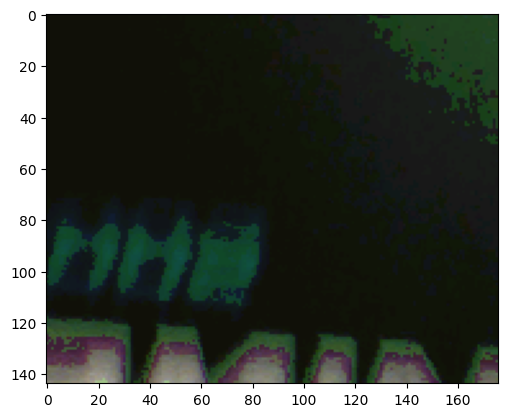

In [70]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()